In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
from scipy.optimize import differential_evolution
import sympy as sp

In [2]:
# Question 1(a)

Minimas found:
x = 0.07935, f(x) = -1.15017
x = 1.22000, f(x) = 0.07038
x = 0.39839, f(x) = -0.15889
x = 0.96609, f(x) = -1.48907
x = 0.62917, f(x) = -0.46129
Global minimum at x = 0.96609, f(x) = -1.48907


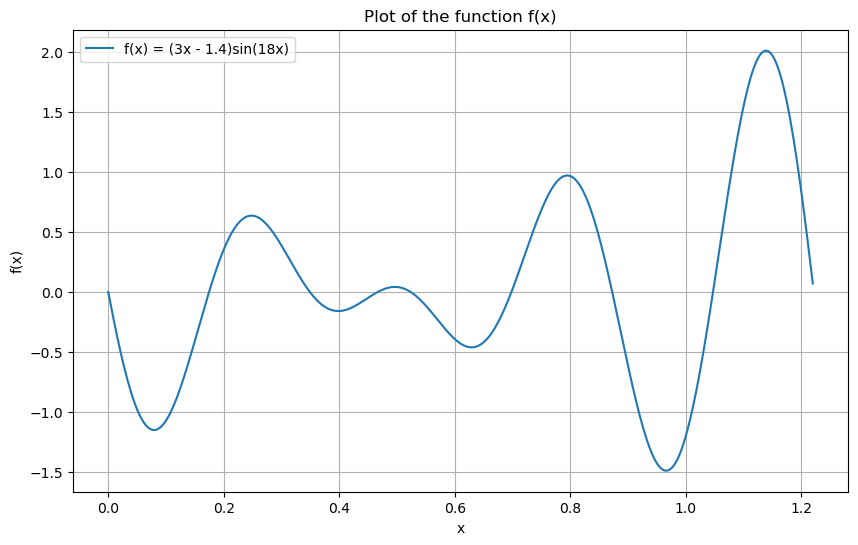

In [3]:
def f(x):
    return (3*x - 1.4) * np.sin(18*x)

x = np.linspace(0, 1.22, 400)

y = f(x)

def find_minima(interval, f):
    results = []
    for start in np.linspace(interval[0], interval[1], 100):
        res = minimize(f, start, bounds=[interval])

        if not any(abs(res.fun - r.fun) < 1e-5 for r in results):
            results.append(res)
    return results

minima_results = find_minima((0, 1.22), f)

print("Minimas found:")
for result in minima_results:
    print(f"x = {result.x[0]:.5f}, f(x) = {result.fun:.5f}")

global_min = min(minima_results, key=lambda x: x.fun)

print(f"Global minimum at x = {global_min.x[0]:.5f}, f(x) = {global_min.fun:.5f}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = (3x - 1.4)sin(18x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Question 1(b)

In [10]:
from scipy.optimize import minimize_scalar

# Define the function
def f(x):
    return (3*x - 1.4) * np.sin(18*x)

def f_bounded(x, bounds):
    if x < bounds[0] or x > bounds[1]:
        return np.inf
    result = f(x)
    if np.isnan(result) or np.isinf(result):
        return np.inf
    return result

# Find the global minimum using minimize_scalar with Brent method
result_brent = minimize_scalar(f_bounded, args=((0, 1.22),), method='brent')
print("Global minimum (Brent method):")
print(f"x = {result_brent.x:.5f}, f(x) = {result_brent.fun:.5f}")

# Find the global minimum using minimize_scalar with Golden method
result_golden = minimize_scalar(f_bounded, args=((0, 1.22),), method='golden')
print("\nGlobal minimum (Golden method):")
print(f"x = {result_golden.x:.5f}, f(x) = {result_golden.fun:.5f}")

# Find the global minimum using minimize_scalar with Bounded method
result_bounded = minimize_scalar(f, bounds=(0, 1.22), method='bounded')
print("\nGlobal minimum (Bounded method):")
print(f"x = {result_bounded.x:.5f}, f(x) = {result_bounded.fun:.5f}")


Global minimum (Brent method):
x = 0.96609, f(x) = -1.48907

Global minimum (Golden method):
x = 0.96609, f(x) = -1.48907

Global minimum (Bounded method):
x = 0.39839, f(x) = -0.15889


In [ ]:
# Question 1(c)

In [12]:
def f(x):
    return (3*x - 1.4) * np.sin(18*x)

bounds = [(0, 1.22)]

result = differential_evolution(f, bounds)

print("Global minimum (Differential Evolution):")
print(f"x = {result.x[0]:.5f}, f(x) = {result.fun:.5f}")


Global minimum (Differential Evolution):
x = 0.96609, f(x) = -1.48907


In [ ]:
# Question 5

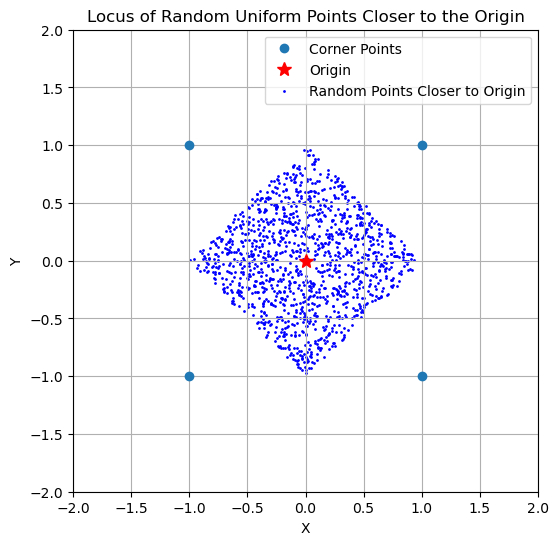

In [17]:
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

corner_points = [(-1, 1), (1, 1), (-1, -1), (1, -1)]
origin = (0, 0)

n_points = 10000

x_values = np.random.uniform(-2, 2, n_points)
y_values = np.random.uniform(-2, 2, n_points)
random_points = np.column_stack((x_values, y_values))

points_closer_to_origin = [point for point in random_points if all(distance(point, origin) < distance(point, corner) for corner in corner_points)]

points_closer_to_origin_array = np.array(points_closer_to_origin)

plt.figure(figsize=(6, 6))
plt.plot(*zip(*corner_points), 'o', label='Corner Points')
plt.plot(origin[0], origin[1], 'r*', markersize=10, label='Origin')
plt.scatter(points_closer_to_origin_array[:, 0], points_closer_to_origin_array[:, 1], s=1, color='blue', label='Random Points Closer to Origin')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend()
plt.title('Locus of Random Uniform Points Closer to the Origin')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
# Question 4(a)

In [ ]:
# Formulas 
# y = mx + b
#       m = (N*sum(xy) - sum(x)*sum(y)) / (N*sum(x**2) - (sum(x))**2)
#       b = (sum(y) - m*sum(x)) / N

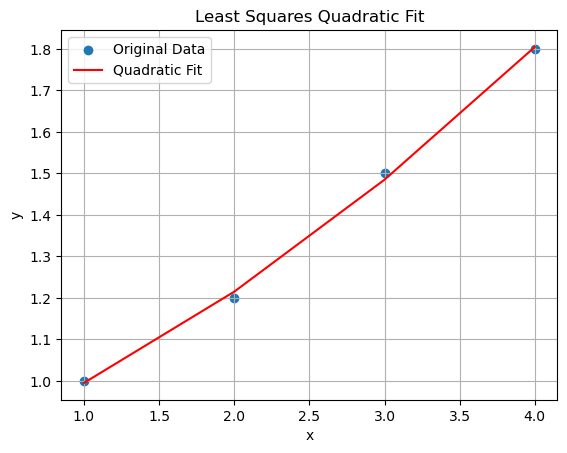

In [26]:
x = np.array([1, 2, 3, 4])
y = np.array([1.0, 1.2, 1.5, 1.8])

X_quad = np.vstack([x**2, x, np.ones_like(x)]).T

coefficients_quad = np.linalg.lstsq(X_quad, y, rcond=None)[0]

a, b, c_quad = coefficients_quad
y_hat_quad = a * x**2 + b * x + c_quad

plt.scatter(x, y, label='Original Data')
plt.plot(x, y_hat_quad, color='red', label='Quadratic Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Quadratic Fit')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Question 4(b)

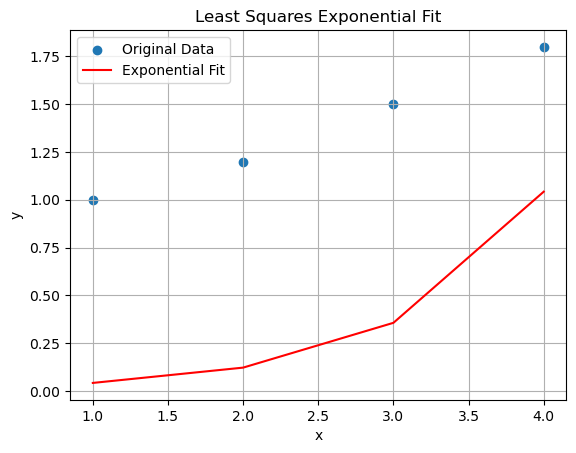

In [27]:
x = np.array([1, 2, 3, 4])
y = np.array([1.0, 1.2, 1.5, 1.8])

X_exp = np.vstack([np.exp(x), np.ones_like(x)]).T

coefficients_exp = np.linalg.lstsq(X_exp, y, rcond=None)[0]

c_exp, b_exp = coefficients_exp

y_hat_exp = c_exp * np.exp(b_exp * x)

plt.scatter(x, y, label='Original Data')
plt.plot(x, y_hat_exp, color='red', label='Exponential Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Exponential Fit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Question 4(c)

In [28]:
error_quad = np.sum((y - y_hat_quad)**2)

error_exp = np.sum((y - y_hat_exp)**2)

print("Error measure for Quadratic Fit:", error_quad)
print("Error measure for Exponential Fit:", error_exp)


Error measure for Quadratic Fit: 0.000500000000000002
Error measure for Exponential Fit: 3.963944553867989


In [ ]:
# Question 4(d)

In [32]:
x = sp.symbols('x')

x_values = [1, 2, 3, 4]
y_values = [1.0, 1.2, 1.5, 1.8]

phi_0 = 1
phi_1 = x - 2.5

a_0 = sum((phi_0 * y_i)**2 for y_i in y_values)
a_1 = sum(((phi_1.subs(x, x_i)) * y_i)**2 for x_i, y_i in zip(x_values, y_values))

inner_product = sp.integrate(phi_0 * phi_1, (x, min(x_values), max(x_values)))

print("a_0:", a_0)
print("a_1:", a_1)
print("Inner product of phi_0 and phi_1:", inner_product)

a_0: 7.93
a_1: 10.4625000000000
Inner product of phi_0 and phi_1: 0
